In [83]:
from scipy import signal
import scipy
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import sys, os
import json

#my modules
import patch_visu as pview 
from dotunf import  *

rootdir='../../'
fdir=rootdir+'figures/'
if not os.path.exists(fdir):
    os.makedirs(fdir)
    
%matplotlib inline

font = {'family' : 'fantasy',
        #'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

print os.path.abspath(pview.__file__)

/Users/yabebal/My-Works/romepy/patch_visu.pyc


In [90]:
fcln=rootdir+'output/fits4096/SurfDensMap/almn_all.unf.cln'
nmax=128
lmax=2000
cln_raw=read_unf(fcln).reshape((lmax+1,nmax+1))

nn2=(np.arange(nmax+1))**2
print nn2.shape
print cln_raw.shape
l4cln=cln_raw
l4cln[0,:]=0
l4cln[:,0]=0
#for ell in np.arange(2,lmax):
#    l4cln[ell,2:nmax]=cln_raw[ell,2:nmax] #*(ell**(2))*nn2

(129,)
(2001, 129)


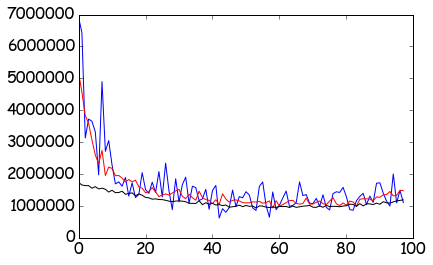

In [95]:
plt.plot(l4cln[10,2:100])
plt.plot(l4cln[100,2:100],'r')
plt.plot(l4cln[1000,2:100],'k')
#plt.xscale('log')

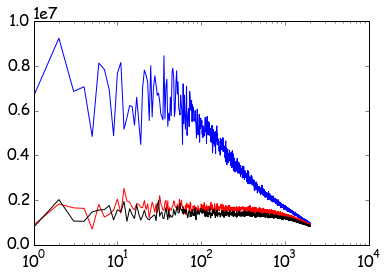

In [97]:
plt.plot(l4cln[2:,2])
plt.plot(l4cln[2:,20],'r')
plt.plot(l4cln[2:,100],'k')
plt.xscale('log')

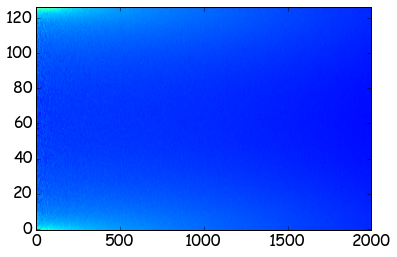

In [99]:
img_cln = scipy.misc.toimage(np.log10(l4cln[2:,2:].transpose()))# , cmin=1e5, cmax=2e6)
plt.imshow(img_cln,aspect='auto',origin='lower')


In [70]:
help(scipy.misc.toimage)

Help on function toimage in module scipy.misc.pilutil:

toimage(arr, high=255, low=0, cmin=None, cmax=None, pal=None, mode=None, channel_axis=None)
    Takes a numpy array and returns a PIL image.
    
    The mode of the PIL image depends on the array shape and the `pal` and
    `mode` keywords.
    
    For 2-D arrays, if `pal` is a valid (N,3) byte-array giving the RGB values
    (from 0 to 255) then ``mode='P'``, otherwise ``mode='L'``, unless mode
    is given as 'F' or 'I' in which case a float and/or integer array is made.
    
    Notes
    -----
    For 3-D arrays, the `channel_axis` argument tells which dimension of the
    array holds the channel data.
    
    For 3-D arrays if one of the dimensions is 3, the mode is 'RGB'
    by default or 'YCbCr' if selected.
    
    The numpy array must be either 2 dimensional or 3 dimensional.



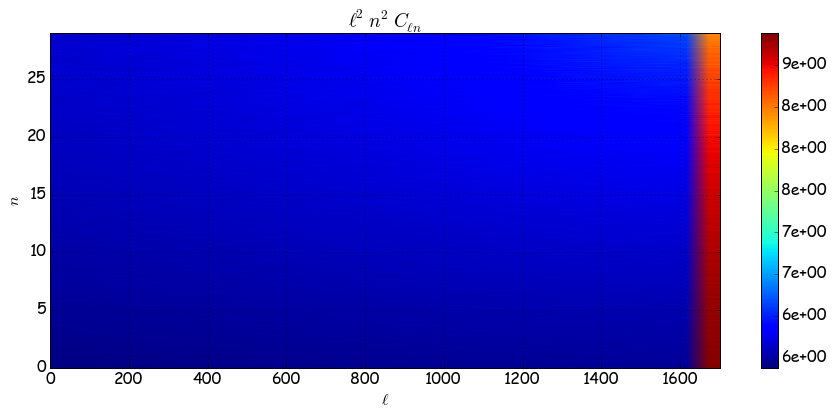

In [81]:
tits='$\ell^2n^2C_{\ell n}$' #: $\ell_{max}$=2500; $n_{max}$=62
#norm = LogNorm() 
img = pview.mat_view(np.log10(l4cln[300:2000,100:]),cmap='jet',
                     xlabel='$\ell$',ylabel='$n$',
                     title=tits,figsize=(15,6),
                    fout=fdir+'l2n2Cln.png') # ,ax_range=[1e5,1e6])

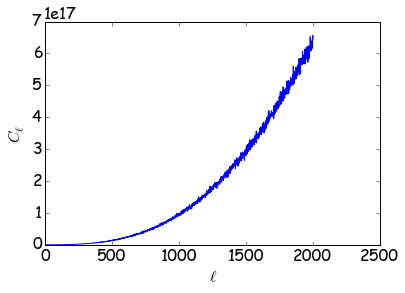

In [7]:
plt.plot(cln_raw.mean(axis=1)[1:])  #/(np.arange(lmax)**2+1)
plt.xlim([1,2500])
#plt.yscale('log')
#plt.xscale('log')

plt.xlabel('$\ell$')
plt.ylabel('$C_{\ell}$')
plt.savefig(fdir+'Cl_projected.png')

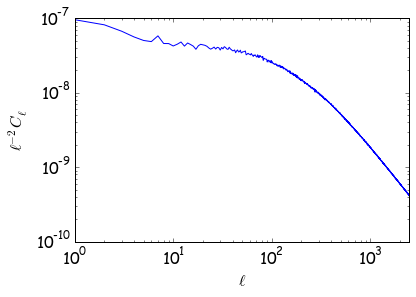

In [44]:
plt.plot(cln_raw.mean(axis=1)[1:]/(np.arange(lmax)**2+1))  #*np.arange(lmax+1)**2
plt.xlim([1,2500])
plt.yscale('log')
plt.xscale('log')

plt.xlabel('$\ell$')
plt.ylabel('$\ell^{-2}C_{\ell}$')
plt.savefig(fdir+'ell-2Cl_projected.png')